# Linear Regression
## Gradient Descent
** November 2017 **

** Andrew Riberio @ [AndrewRib.com](http://www.andrewrib.com) **

In this notebook we will show how gradient descent can be used to itteratively solve linear regression using least squares. 

** Note: ** This notebook contains interactive elements and certain latex snippets that will not render in github markdown. You must run this notebook on your local Jupyter notebook environment. 

## Libraries

In [2]:
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets as skd
from IPython.display import display, clear_output
import time
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib inline

## Deriving the Gradient
We now know what the solution space of linear regression looks like - it is convex. This means if we start at any point, which represents a possible regression line, and follow the steepest path, i.e. the largest gradient, we will eventually arrive at the global minimum -- the bottom of the convex cup. 

We start off with:
$$
MSE(\mathbf{x},\mathbf{y},h_\theta) = \frac{1}{m} \lVert h_\theta(\mathbf{x})- \mathbf{y} \rVert^{2}_{2} \tag{1} \\ 
$$
Where:
* The predicted value: $h_\theta(\mathbf{x})= \mathbf{\theta_{0}}+ \mathbf{\theta_{1}}\mathbf{x}$
    * $\theta_0$ = y_intercept 
    * $\theta_1$ = slope
    
    
* The data vector: $\mathbf{x}$
* The number of items in our dataset $\mathbf{x}$: m

**Note: The arithmetic here is element-wise vector arithmetic.**

We would now like to give this a more linear form. Since $ h_\theta(\mathbf{x})$ is a linear function, it can be written as a matrix. In order for the math to work out we must also augment the dataset X to include a bias term 1. With these changes we get:
$$
MSE(\mathbf{x},\mathbf{y},\mathbf{A}) = \frac{1}{m} \lVert \mathbf{A}\mathbf{x}- \mathbf{y} \rVert^{2}_{2} \tag{1} \\ 
$$

We can expand this out to show explicity how A and x are being multiplied, where $\theta_i$ is the i'th component of the A vector. We also show what MSE looks like as a summnation. Both forms are equivalent. Since we are teating X as fixed ( our dataset will not change over gradient descent ), we will use the cost function J to make things cleaner. 

$$
MSE(\mathbf{x},\mathbf{y},\mathbf{A}) = \frac{1}{m} \lVert \mathbf{A_{0}}\mathbf{x_0}+ \mathbf{A_{1}}\mathbf{x_1} - \mathbf{x} \rVert^{2}_{2} \tag{1} \\ 
$$
$$
\large J(\theta) = MSE(\mathbf{x},\mathbf{y},\theta_{0},\theta_{1}) = \frac{1}{m} \sum_{i=1}^m{(\mathbf{\theta_{0}}\mathbf{x_0^i}+ \mathbf{\theta_{1}}\mathbf{x_1^i} - \mathbf{x^i})^2 } \tag{1} \\ 
$$

Now we'd like to find:
$$
\large \nabla_{\mathbf{A}} MSE(\mathbf{x},\mathbf{y},\mathbf{A}) =  \nabla_{\mathbf{\theta}}J(\theta)
$$

Which means we need to find the partial derivitives with respect to each component of A. Meaning we need to find: 

$$
\large \nabla_{\mathbf{\theta}}J(\theta) = \nabla_{\mathbf{A}} MSE(\mathbf{x},\mathbf{y},\mathbf{A}) = [\frac{\partial{J}}{\partial{\theta_{0}}},\frac{\partial{J}}{\partial{\theta_{1}}}]
$$

Before we do this, we generally add a 2 * M so that the square cancels out when we are doing our partial derivitives. 

$$
\large J(\theta) = \frac{1}{2m} \sum_{i=1}^m(\mathbf{\theta_{0}}+ \mathbf{\theta_{1}}\mathbf{x^i} - \mathbf{y^i})^2
$$

$$
\large \frac{\partial}{\partial{\theta_{0}}}J(\theta) = Bias Gradient = \frac{1}{m} \sum_{i=1}^m{\mathbf{\theta_{0}}+ \mathbf{\theta_{1}}\mathbf{x^i} - \mathbf{y^i}}
$$

$$
\large \frac{\partial}{\partial{\theta_{1}}}J(\theta) = Slope Gradient =\frac{1}{m} \sum_{i=1}^m{(\mathbf{\theta_{0}}+ \mathbf{\theta_{1}}\mathbf{x^i} - \mathbf{y^i})\mathbf{x^i}} 
$$

We can now use the gradient with respect to the linear parameters to start with a solution ( a particular line ) and make it incrementally better. 

## Gradient Descent

In [35]:
def mse(yPredict,yActual):
    return np.square(yPredict.T-yActual.T).mean()
    
def h(slope,y_intercept):
    return lambda x:slope*x+y_intercept

def biasGradient(slope,intercept,X,Y):
    m = len(X)
    total = 0
    for x,y in zip(X,Y):
        total += intercept + slope*x - y
    return total/m

def slopeGradient(slope,intercept,X,Y):
    m = len(X)
    total = 0
    for x,y in zip(X,Y):
        total += (intercept + slope*x - y)*y
    return total/m

def plotLineOnData(lineIntercept,lineSlope,X,Y):
    ys = np.apply_along_axis(h(lineSlope,lineIntercept), 0, X)
    mseV = mse(ys,Y)
    
    plt.figure(figsize=(10,10))
    
    plt.title("Mean Squared Error: {0}".format(mseV),fontsize=15)
    plt.ylabel("Dependent Variable (Y)",fontsize=15)
    plt.xlabel("Independent Variable (X)",fontsize=15)
    plt.scatter(X,Y)
    plt.plot(X,ys)
    plt.show()
    
def descent(lineSlope,lineIntercept):
    ys = np.apply_along_axis(h(lineSlope,lineIntercept), 0, X)
    
    mseV = mse(ys,Y)

    ls = lineSlope - learningRate*slopeGradient(lineSlope,lineIntercept,X,Y)
    li = lineIntercept - learningRate*biasGradient(lineSlope,lineIntercept,X,Y)
    
    return [ls,li,mseV]


When you run the code below, it will itteratively use the parameters set above to fit the regression line. 

Found Best Line: y = 42.43530825979012 * x + -0.08143288774564013


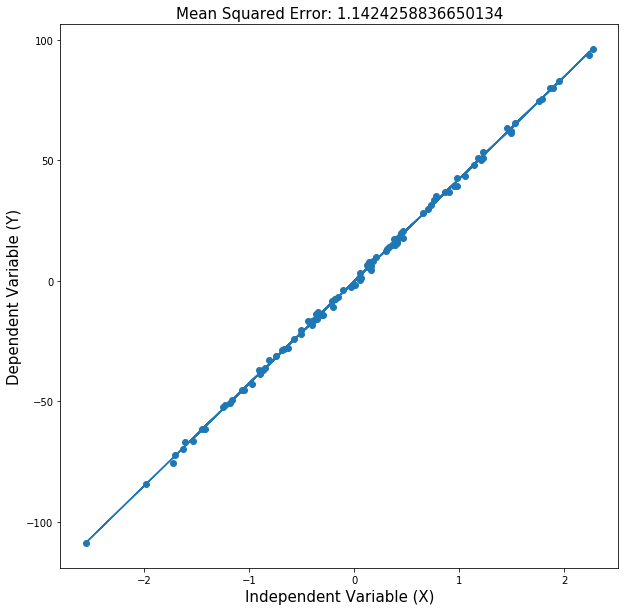

In [52]:
## Play with these values. ###

# Initial line
lineSlope = 0
lineIntercept = 0

# How noisy is the linear data generator? 0 is a perfect line. 
dataNoise = 1

# Setting for gradient descent 
learningRate = 0.0001

# The loop will break when we start climbing up hill. 
# Set high to go until we find the best fit. 
itterations = 1000000000
##########################

X,Y = skd.make_regression(100,1,random_state=0, noise=dataNoise)
pMSE = 1000000000000000000000
pS,pI = 0,0

for i in range(itterations):
    lineSlope,lineIntercept,mseV = descent(lineSlope,lineIntercept)
    if(mseV < pMSE):
        # Make sure we keep getting better solutions. We don't want to go up hill. 
        #print("MSE[{0}] = {1}".format(i+1,mseV))
        pMSE = mseV 
        pS = lineSlope
        pI = lineIntercept
    else:
        # Since this problem is convex, if we get a worse solution, we are going up hill
        # the previous itteration found the best line. 
        print("Found Best Line: y = {0} * x + {1}".format(pS[0],pI[0]))
        break
        
plotLineOnData(pI,pS,X,Y)